In [21]:
# Importing libraries and Setting Dislplay Options

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from bs4 import BeautifulSoup
import requests
import re

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import scipy.stats as stats


from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, RidgeCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score


#Setting Options
pd.set_option('display.max_columns', 75)
pd.set_option('display.max_rows', 100)

In [3]:
player_list= pd.read_pickle("scrape-final")
#Changing columns order
player_list = player_list[['Name','Value','Age','Overall','Potential','Team','Height','Weight','Foot','Best_Overall',
                           'Position','Growth','Wage','Release_Clause','Attacking','Crossing','Finishing',
                           'Heading_Accuracy','Short_Passing','Volleys','Skill','Dribbling','Curve','FK_Accuracy',
                           'Long_Passing','Ball_Control','Movement','Acceleration','Sprint_Speed','Agility',
                           'Reactions','Balance','Power','Shot_Power','Jumping','Stamina','Strength','Long_Shots',
                           'Mentality','Aggression','Interceptions','Positioning','Vision','Penalties','Composure',
                           'Defending','Marking','Standing_Tackle','Sliding_Tackle','Goalkeeping','GK_Diving',
                           'GK_Handling','GK_Kicking','GK_Positioning','GK_Reflexes','Total_Stats','Base_Stats',
                           'Int_Reputation','PAC','SHO','PAS','DRI','DEF','PHY']]
player_list

,Name,Value,Age,Overall,Potential,Team,Height,Weight,Foot,Best_Overall,Position,Growth,Wage,Release_Clause,Attacking,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Skill,Dribbling,Curve,FK_Accuracy,Long_Passing,Ball_Control,Movement,Acceleration,Sprint_Speed,Agility,Reactions,Balance,Power,Shot_Power,Jumping,Stamina,Strength,Long_Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing_Tackle,Sliding_Tackle,Goalkeeping,GK_Diving,GK_Handling,GK_Kicking,GK_Positioning,GK_Reflexes,Total_Stats,Base_Stats,Int_Reputation,PAC,SHO,PAS,DRI,DEF,PHY
0,A. Mac Allister,30.00,23,80,84,Brighton &amp; Hove Albion,176,72,Right,82,CAM,4,0.06500,59.30,375,79,78,61,83,74,408,80,83,82,81,82,370,73,68,73,80,76,374,78,64,82,69,81,368,64,64,78,81,81,81,209,72,72,65,56,7,10,14,15,10,2160,450,1,70,79,81,80,69,71
5,O. Kökçü,39.50,21,81,86,Feyenoord,175,68,Right,83,CM,5,0.01200,58.30,346,78,71,41,84,72,408,77,82,82,84,83,378,75,69,81,73,80,377,77,60,87,70,83,393,85,72,75,84,77,77,207,68,71,68,43,9,6,10,6,12,2152,453,2,72,75,83,79,67,77
6,E. Dick,0.19,27,58,60,Minnesota United,196,93,Right,58,GK,2,0.00100,0.29,79,9,10,20,30,10,79,10,14,11,34,10,178,40,30,32,52,24,207,44,53,25,75,10,115,35,12,5,52,11,30,59,14,25,20,286,55,60,58,58,55,1003,322,1,55,60,58,55,36,58
8,Gabri Veiga,3.60,20,69,85,Celta de Vigo,184,71,Right,73,CAM,16,0.00800,9.80,299,55,76,52,71,45,330,74,56,54,69,77,347,72,71,74,65,65,341,73,60,69,65,74,291,46,56,63,66,60,68,156,41,60,55,55,13,14,13,6,9,1819,396,1,71,72,65,74,52,62
9,A. Al Musrati,30.50,26,81,84,Sporting Braga,189,83,Right,82,CDM,3,0.01900,63.30,321,60,61,65,80,55,321,71,43,48,81,78,300,59,64,56,76,45,381,79,64,82,87,69,344,79,82,60,72,51,81,241,80,82,79,45,15,6,8,8,8,1953,431,1,62,65,71,71,79,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18668,22 Hwang Jung Wook,0.11,21,49,62,Incheon United,188,83,Right,51,CB,13,0.00055,0.21,153,19,18,52,39,25,141,26,20,21,42,32,207,43,39,56,34,35,182,26,50,33,60,13,173,53,40,26,32,22,33,157,52,56,49,78,17,12,17,16,16,1091,227,1,41,20,32,32,51,51
18669,Kim Chae Woon,0.70,22,61,72,Incheon United,177,73,Left,61,LWB,11,0.00085,1.00,222,56,36,43,49,38,239,61,46,45,38,49,323,64,65,62,62,70,244,42,58,68,43,33,235,61,59,45,38,32,43,176,57,62,57,54,8,14,14,9,9,1493,317,1,65,37,46,57,58,54
18670,Kim Jeong hoon,0.32,21,57,68,Jeonbuk Motors,188,82,Right,57,GK,11,0.00090,0.49,57,12,8,12,18,7,63,10,12,9,16,16,136,17,17,30,40,32,180,38,50,24,59,9,98,22,15,10,36,15,38,42,14,13,15,283,58,55,50,57,63,859,300,1,58,55,50,63,17,57
18671,Alejandro Garnacho,4.00,18,70,86,Manchester United,180,72,Right,70,LW,16,0.02100,10.10,292,63,67,44,63,55,315,74,68,61,47,65,411,86,83,85,71,86,274,61,38,67,50,58,266,46,33,68,63,56,67,87,28,35,24,55,6,15,14,13,7,1700,366,1,84,63,61,73,32,53


In [4]:
#View the correlations
corr_mat = player_list.corr()
corr_mat

C:\Users\adhna\AppData\Local\Temp\ipykernel_14268\3573284818.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = player_list.corr()


,Value,Age,Overall,Potential,Best_Overall,Growth,Wage,Release_Clause,Attacking,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Skill,Dribbling,Curve,FK_Accuracy,Long_Passing,Ball_Control,Movement,Acceleration,Sprint_Speed,Agility,Reactions,Balance,Power,Shot_Power,Jumping,Stamina,Strength,Long_Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing_Tackle,Sliding_Tackle,Goalkeeping,GK_Diving,GK_Handling,GK_Kicking,GK_Positioning,GK_Reflexes,Total_Stats,Base_Stats,Int_Reputation,PAC,SHO,PAS,DRI,DEF,PHY
Value,1.000000,0.164331,0.561993,0.500093,0.565827,-0.203275,0.827287,0.995211,0.294396,0.267733,0.231515,0.196537,0.328701,0.258034,0.308801,0.257801,0.294556,0.257902,0.324190,0.295355,0.257190,0.164791,0.173720,0.203069,0.505401,0.126275,0.341633,0.337554,0.163288,0.250312,0.192762,0.259675,0.316416,0.237351,0.188585,0.246096,0.365307,0.205739,0.405442,0.169596,0.190755,0.165469,0.145393,-0.015972,-0.017038,-0.017087,-0.016554,-0.014081,-0.014073,0.382110,0.501744,0.543859,0.239318,0.307752,0.425384,0.424724,0.212301,0.310513
Age,0.164331,1.000000,0.578253,-0.084337,0.529950,-0.871325,0.280022,0.149089,0.277947,0.251012,0.192667,0.238840,0.286837,0.243116,0.265677,0.165136,0.259382,0.280016,0.300922,0.236476,0.111120,-0.015661,-0.007719,0.087798,0.530735,0.014912,0.413209,0.366120,0.258979,0.229555,0.383514,0.266595,0.331436,0.302843,0.221456,0.213726,0.332066,0.225028,0.374766,0.176835,0.217195,0.163042,0.143001,0.052524,0.047112,0.051631,0.048609,0.061300,0.050697,0.373442,0.508305,0.383536,0.001866,0.341046,0.446857,0.363885,0.255703,0.485853
Overall,0.561993,0.578253,1.000000,0.683262,0.989523,-0.590123,0.583692,0.552593,0.533523,0.489986,0.396365,0.410274,0.596230,0.435703,0.546098,0.450262,0.500048,0.466196,0.573596,0.539897,0.417548,0.260394,0.275516,0.340296,0.868910,0.174518,0.649059,0.605034,0.335180,0.461546,0.436104,0.468546,0.577399,0.469669,0.377378,0.424925,0.595125,0.384851,0.673209,0.342777,0.384620,0.330586,0.298760,-0.042663,-0.044958,-0.043830,-0.046111,-0.033342,-0.042115,0.688898,0.891985,0.462917,0.355351,0.517217,0.736634,0.722765,0.422627,0.638384
Potential,0.500093,-0.084337,0.683262,1.000000,0.707019,0.186271,0.459013,0.502288,0.356290,0.320810,0.265254,0.255602,0.431183,0.286242,0.387338,0.345610,0.346109,0.293229,0.403239,0.401049,0.341555,0.253017,0.259823,0.282307,0.571375,0.157656,0.377724,0.399670,0.171710,0.274262,0.182999,0.296151,0.373011,0.280954,0.240358,0.278553,0.410545,0.249319,0.471616,0.232008,0.248590,0.228050,0.209583,-0.045011,-0.043500,-0.047203,-0.046843,-0.040586,-0.043964,0.462008,0.604961,0.314591,0.349452,0.329097,0.499361,0.539580,0.275843,0.327873
Best_Overall,0.565827,0.529950,0.989523,0.707019,1.000000,-0.549758,0.579963,0.557363,0.576626,0.507820,0.437179,0.454177,0.642599,0.474018,0.586952,0.491977,0.530141,0.496148,0.613336,0.586251,0.458214,0.304091,0.320852,0.374029,0.873614,0.208049,0.683377,0.627144,0.349460,0.496702,0.439846,0.506342,0.616621,0.497188,0.398835,0.461637,0.620485,0.424338,0.701155,0.368060,0.409153,0.356313,0.323267,-0.101114,-0.102726,-0.101647,-0.103819,-0.090829,-0.099685,0.724035,0.889734,0.449296,0.368119,0.507053,0.724415,0.714258,0.432812,0.635097
Growth,-0.203275,-0.871325,-0.590123,0.186271,-0.549758,1.000000,-0.277892,-0.188200,-0.323962,-0.304608,-0.240059,-0.269447,-0.325532,-0.269786,-0.306553,-0.223736,-0.290175,-0.303091,-0.325973,-0.283050,-0.184200,-0.070631,-0.083453,-0.145759,-0.537440,-0.060514,-0.455724,-0.372220,-0.261157,-0.317805,-0.384475,-0.303023,-0.364511,-0.321336,-0.242038,-0.263785,-0.346864,-0.242185,-0.384409,-0.204711,-0.242679,-0.192684,-0.170277,0.007640,0.012398,0.006786,0.010254,-0.000011,0.008060,-0.416143,-0.531353,-0.275060,-0.091778,-0.332086,-0.439075,-0.375945,-0.263689,-0.496478
Wage,0.827287,0.280022,0.583692,0.459013,0.579963,-0.277892,1.000000,0.819355,0.318791,0.291575,0.237067,0.229837,0.348228,0.283298,0.330355,0.268100,0.321130,0.283244,0

In [5]:
#Correlation With Value (most correlated)
pd.DataFrame(corr_mat["Value"]).sort_values("Value", ascending=False).head(10)

,Value
Value,1.000000
Release_Clause,0.995211
Wage,0.827287
Best_Overall,0.565827
Overall,0.561993
Int_Reputation,0.543859
Reactions,0.505401
Base_Stats,0.501744
Potential,0.500093
PAS,0.425384


In [6]:
#Correlation With Value (least correlated)
pd.DataFrame(corr_mat["Value"]).sort_values("Value", ascending=True).head(10)

,Value
Growth,-0.203275
GK_Handling,-0.017087
GK_Diving,-0.017038
GK_Kicking,-0.016554
Goalkeeping,-0.015972
GK_Positioning,-0.014081
GK_Reflexes,-0.014073
Balance,0.126275
Sliding_Tackle,0.145393
Jumping,0.163288


In [11]:
player_list["Weight"] = player_list["Weight"].astype('int')
player_list["Height"] = player_list["Height"].astype('int')

In [12]:
# Slice data into faeture and target

Xb= player_list.drop(columns=["Value","Name","Team","Foot","Position"])
yb= player_list.loc[:,"Value"]

In [13]:
# fit model with target as player market value 
player_modelb = sm.OLS(yb, Xb, data=player_list)

resultsb = player_modelb.fit()

print(resultsb.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Value   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                          4.192e+04
Date:                Thu, 04 May 2023   Prob (F-statistic):                        0.00
Time:                        23:45:06   Log-Likelihood:                         -15969.
No. Observations:               16060   AIC:                                  3.204e+04
Df Residuals:                   16010   BIC:                                  3.242e+04
Df Model:                          50                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

C:\Users\adhna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['data']
  warnings.warn(msg, ValueWarning)


In [15]:
#what coefficients our regression model has chosen
regressor = LinearRegression()
regressor.fit(Xb,yb)
coeff_df = pd.DataFrame(regressor.coef_, Xb.columns, columns=['Coefficient'])  
coeff_df.sort_values("Coefficient",ascending=False).T

,Wage,Int_Reputation,Release_Clause,Overall,PAC,DEF,DRI,Height,PAS,PHY,Balance,Stamina,Volleys,Finishing,FK_Accuracy,Agility,Power,GK_Handling,GK_Kicking,Long_Passing,Positioning,Vision,Aggression,Sliding_Tackle,Weight,Shot_Power,Marking,Attacking,Reactions,Movement,Long_Shots,Curve,Total_Stats,Skill,Ball_Control,Strength,SHO,Mentality,Goalkeeping,Defending,GK_Reflexes,Jumping,GK_Diving,Crossing,Short_Passing,Penalties,Standing_Tackle,Heading_Accuracy,GK_Positioning,Sprint_Speed,Interceptions,Potential,Acceleration,Dribbling,Base_Stats,Composure,Best_Overall,Growth,Age
Coefficient,5.355422,0.630783,0.495827,0.016545,0.010909,0.010169,0.007803,0.006279,0.004258,0.004029,0.003608,0.002683,0.002489,0.001999,0.001876,0.00177,0.001719,0.001681,0.00163,0.00146,0.001246,0.001237,0.001113,0.000993,0.000473,0.000397,0.000244,0.000152,0.000135,-0.000083,-0.000104,-0.000108,-0.000136,-0.000295,-0.000325,-0.000374,-0.000428,-0.000477,-0.000552,-0.000601,-0.000605,-0.000884,-0.000903,-0.001007,-0.001392,-0.00146,-0.001838,-0.001937,-0.002354,-0.002612,-0.002613,-0.002852,-0.002984,-0.003198,-0.004237,-0.005642,-0.011219,-0.019398,-0.021184


In [16]:
#Prediction on all data and calculate difference between tha actual value and predicted value
y_pred = regressor.predict(Xb)
df = pd.DataFrame({'Name':player_list.Name,'Actual': yb, 'Predicted': y_pred})
df["Difference"] = df["Actual"]-df["Predicted"]
df_under = round(df.sort_values('Difference').set_index('Name').head(10),2)
df_over = round(df.sort_values('Difference').set_index('Name').tail(10),2)
df_under

,Actual,Predicted,Difference
Name,,,
Vinícius Jr.,109.0,123.63,-14.63
Pedri,104.5,118.03,-13.53
F. de Jong,116.5,125.39,-8.89
T. Courtois,90.0,98.21,-8.21
A. Tchouaméni,53.5,61.24,-7.74
Rodrygo,58.5,66.22,-7.72
J. Oblak,79.0,86.43,-7.43
F. Valverde,102.0,108.84,-6.84
R. Araujo,52.0,58.79,-6.79


In [17]:
df_over

,Actual,Predicted,Difference
Name,,,
M. de Ligt,71.0,62.58,8.42
I. Sangaré,35.5,26.92,8.58
V. Osimhen,82.5,73.88,8.62
P. Dybala,69.5,60.79,8.71
C. Nkunku,94.0,84.68,9.32
O. Kökçü,39.5,29.86,9.64
L. Goretzka,72.0,61.63,10.37
17 Victor Valdés,13.0,1.39,11.61
15 Xavi,15.5,3.15,12.35


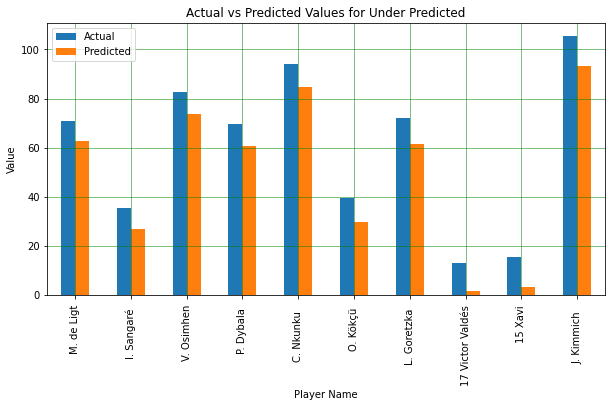

In [18]:
#Plot the comparision of Actual and Predicted Values for Under Predicted
df_over[["Actual","Predicted"]].plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Actual vs Predicted Values for Under Predicted")
plt.xlabel("Player Name")
plt.ylabel('Value')
plt.show()

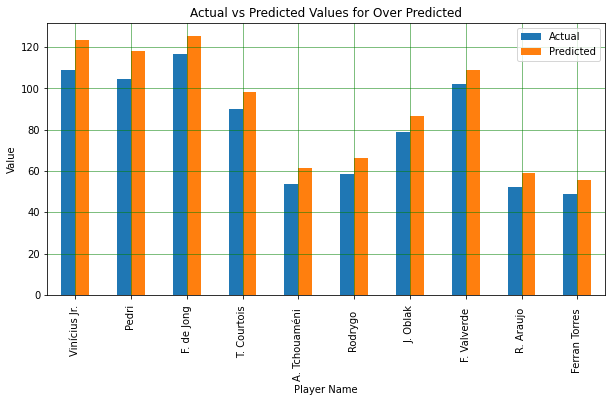

In [19]:
#Plot the comparision of Actual and Predicted Values for Over Predicted

df_under[["Actual","Predicted"]].plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Actual vs Predicted Values for Over Predicted")
plt.xlabel("Player Name")
plt.ylabel('Value')
plt.show()

In [23]:
from sklearn import metrics

#Calculating MAE, MSE, RMSE and R^2 values of our model
print('Mean Absolute Error:', metrics.mean_absolute_error(yb, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(yb, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yb, y_pred)))
print('Linear Regression R^2:',regressor.score(Xb,yb))

Mean Absolute Error: 0.25260440972840525
Mean Squared Error: 0.42678725721639926
Root Mean Squared Error: 0.6532895661315886
Linear Regression R^2: 0.991645575312421


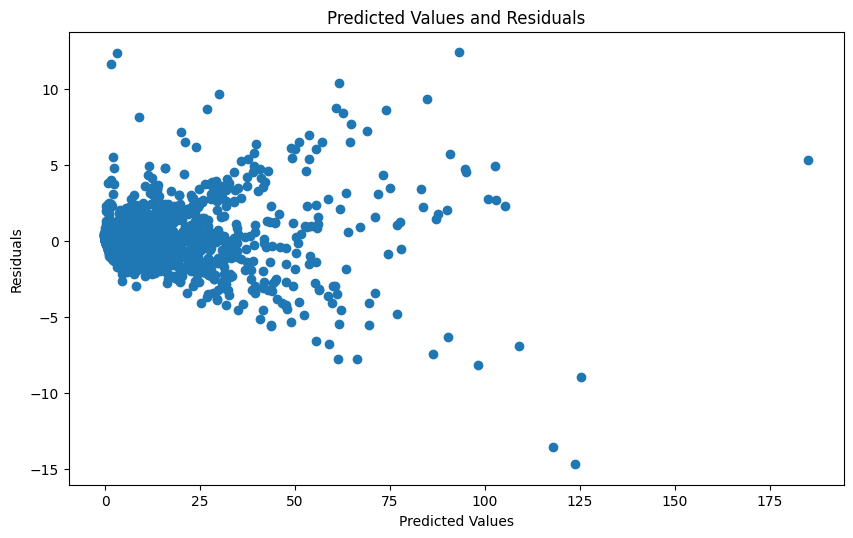

In [24]:
#Plotting Residuals
plt.figure(figsize=(10,6),dpi=100),
plt.style.use('default')
plt.scatter(resultsb.predict(), resultsb.resid);
plt.title("Predicted Values and Residuals")
plt.ylabel("Residuals")
plt.xlabel("Predicted Values")
plt.show()

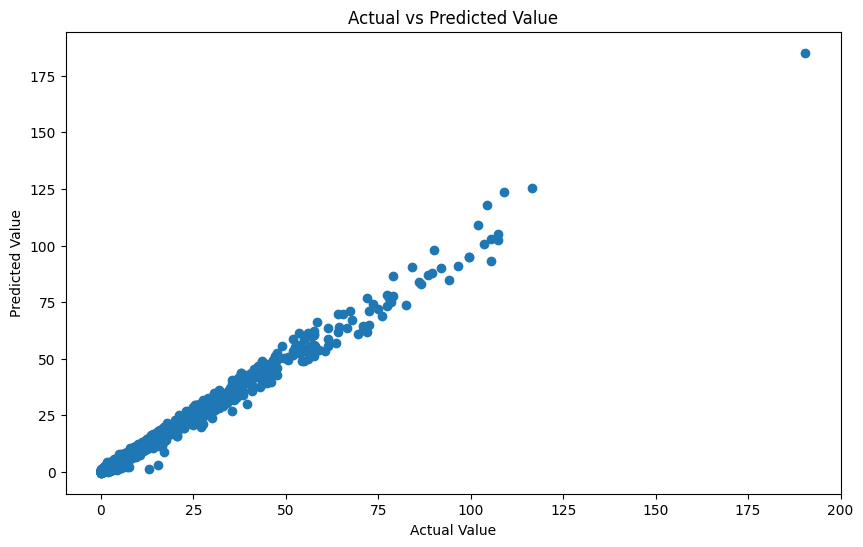

In [27]:
# Actual Values vs Predicted Values
plt.figure(figsize=(10,6),dpi=100),
plt.style.use('default')
plt.scatter(yb, resultsb.predict(Xb))
plt.title ("Actual vs Predicted Value")
plt.ylabel("Predicted Value")
plt.xlabel("Actual Value")
plt.show()

In [28]:
#Model based on most selected columns

X1= player_list.loc[:,['Overall','Age','Int_Reputation','Growth','Release_Clause']]
y1= player_list.loc[:,"Value"]

player_model1 = sm.OLS(y1, X1, data=player_list)

results1 = player_model1.fit()

print(results1.summary());

                                 OLS Regression Results                                
Dep. Variable:                  Value   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                          4.122e+05
Date:                Fri, 05 May 2023   Prob (F-statistic):                        0.00
Time:                        14:08:53   Log-Likelihood:                         -16126.
No. Observations:               16060   AIC:                                  3.226e+04
Df Residuals:                   16055   BIC:                                  3.230e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

C:\Users\adhna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['data']
  warnings.warn(msg, ValueWarning)


In [31]:
player_list['Value_log']=np.log(player_list['Value'])
player_list

,Name,Value,Age,Overall,Potential,Team,Height,Weight,Foot,Best_Overall,Position,Growth,Wage,Release_Clause,Attacking,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Skill,Dribbling,Curve,FK_Accuracy,Long_Passing,Ball_Control,Movement,Acceleration,Sprint_Speed,Agility,Reactions,Balance,Power,Shot_Power,Jumping,Stamina,Strength,Long_Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing_Tackle,Sliding_Tackle,Goalkeeping,GK_Diving,GK_Handling,GK_Kicking,GK_Positioning,GK_Reflexes,Total_Stats,Base_Stats,Int_Reputation,PAC,SHO,PAS,DRI,DEF,PHY,Value_log
0,A. Mac Allister,30.00,23,80,84,Brighton &amp; Hove Albion,176,72,Right,82,CAM,4,0.06500,59.30,375,79,78,61,83,74,408,80,83,82,81,82,370,73,68,73,80,76,374,78,64,82,69,81,368,64,64,78,81,81,81,209,72,72,65,56,7,10,14,15,10,2160,450,1,70,79,81,80,69,71,3.401197
5,O. Kökçü,39.50,21,81,86,Feyenoord,175,68,Right,83,CM,5,0.01200,58.30,346,78,71,41,84,72,408,77,82,82,84,83,378,75,69,81,73,80,377,77,60,87,70,83,393,85,72,75,84,77,77,207,68,71,68,43,9,6,10,6,12,2152,453,2,72,75,83,79,67,77,3.676301
6,E. Dick,0.19,27,58,60,Minnesota United,196,93,Right,58,GK,2,0.00100,0.29,79,9,10,20,30,10,79,10,14,11,34,10,178,40,30,32,52,24,207,44,53,25,75,10,115,35,12,5,52,11,30,59,14,25,20,286,55,60,58,58,55,1003,322,1,55,60,58,55,36,58,-1.660731
8,Gabri Veiga,3.60,20,69,85,Celta de Vigo,184,71,Right,73,CAM,16,0.00800,9.80,299,55,76,52,71,45,330,74,56,54,69,77,347,72,71,74,65,65,341,73,60,69,65,74,291,46,56,63,66,60,68,156,41,60,55,55,13,14,13,6,9,1819,396,1,71,72,65,74,52,62,1.280934
9,A. Al Musrati,30.50,26,81,84,Sporting Braga,189,83,Right,82,CDM,3,0.01900,63.30,321,60,61,65,80,55,321,71,43,48,81,78,300,59,64,56,76,45,381,79,64,82,87,69,344,79,82,60,72,51,81,241,80,82,79,45,15,6,8,8,8,1953,431,1,62,65,71,71,79,83,3.417727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18668,22 Hwang Jung Wook,0.11,21,49,62,Incheon United,188,83,Right,51,CB,13,0.00055,0.21,153,19,18,52,39,25,141,26,20,21,42,32,207,43,39,56,34,35,182,26,50,33,60,13,173,53,40,26,32,22,33,157,52,56,49,78,17,12,17,16,16,1091,227,1,41,20,32,32,51,51,-2.207275
18669,Kim Chae Woon,0.70,22,61,72,Incheon United,177,73,Left,61,LWB,11,0.00085,1.00,222,56,36,43,49,38,239,61,46,45,38,49,323,64,65,62,62,70,244,42,58,68,43,33,235,61,59,45,38,32,43,176,57,62,57,54,8,14,14,9,9,1493,317,1,65,37,46,57,58,54,-0.356675
18670,Kim Jeong hoon,0.32,21,57,68,Jeonbuk Motors,188,82,Right,57,GK,11,0.00090,0.49,57,12,8,12,18,7,63,10,12,9,16,16,136,17,17,30,40,32,180,38,50,24,59,9,98,22,15,10,36,15,38,42,14,13,15,283,58,55,50,57,63,859,300,1,58,55,50,63,17,57,-1.139434
18671,Alejandro Garnacho,4.00,18,70,86,Manchester United,180,72,Right,70,LW,16,0.02100,10.10,292,63,67,44,63,55,315,74,68,61,47,65,411,86,83,85,71,86,274,61,38,67,50,58,266,46,33,68,63,56,67,87,28,35,24,55,6,15,14,13,7,1700,366,1,84,63,61,73,32,53,1.386294


In [32]:
#Correlation matrics of selected features
player_list_selected_features= player_list[['Value_log','Overall','Age','Int_Reputation','Growth','Release_Clause','Height','Weight']]

player_list_selected_features.corr()

,Value_log,Overall,Age,Int_Reputation,Growth,Release_Clause,Height,Weight
Value_log,1.000000,0.928312,0.284447,0.416222,-0.342670,0.635716,0.016313,0.080287
Overall,0.928312,1.000000,0.578253,0.462917,-0.590123,0.552593,0.048908,0.160775
Age,0.284447,0.578253,1.000000,0.383536,-0.871325,0.149089,0.058555,0.226104
Int_Reputation,0.416222,0.462917,0.383536,1.000000,-0.275060,0.521249,0.046943,0.109515
Growth,-0.342670,-0.590123,-0.871325,-0.275060,1.000000,-0.188200,-0.020670,-0.190056
Release_Clause,0.635716,0.552593,0.149089,0.521249,-0.188200,1.000000,0.029022,0.052125
Height,0.016313,0.048908,0.058555,0.046943,-0.020670,0.029022,1.000000,0.763166
Weight,0.080287,0.160775,0.226104,0.109515,-0.190056,0.052125,0.763166,1.000000


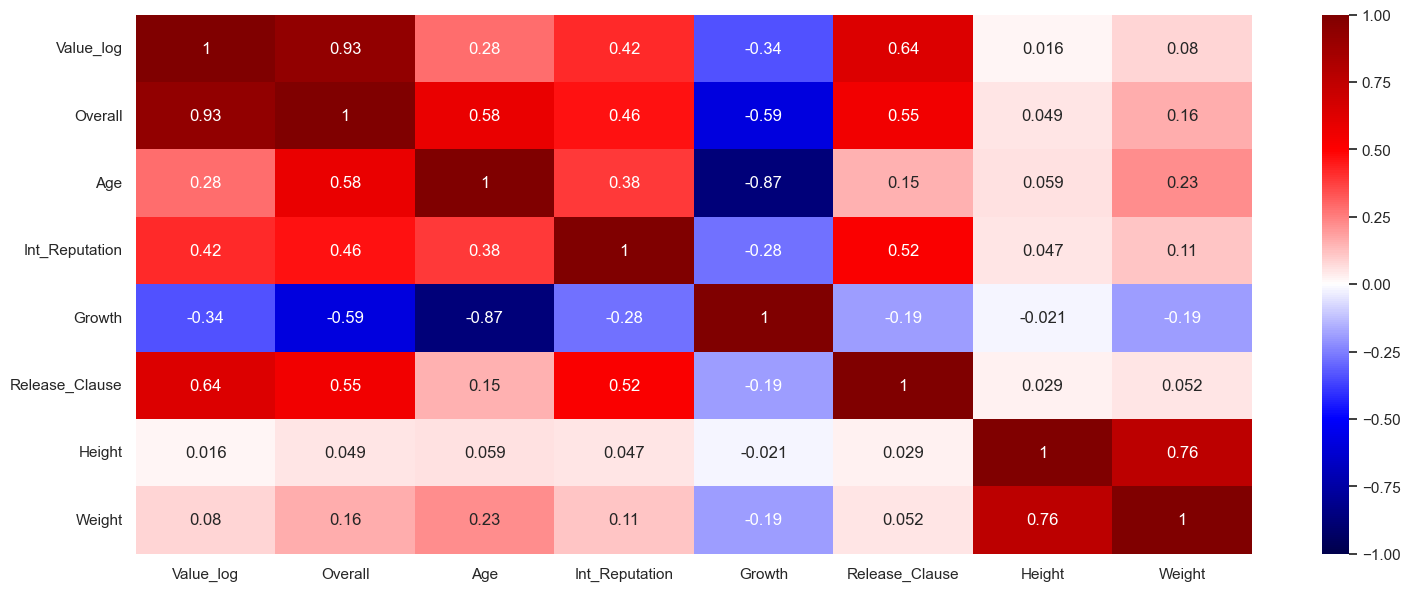

In [33]:
#Heatmap of correlation values
plt.figure(1, figsize=(18, 7))
sns.set(style="whitegrid")
sns.heatmap(player_list_selected_features.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)
plt.yticks(rotation=0); 
plt.show()

<Figure size 1800x700 with 0 Axes>

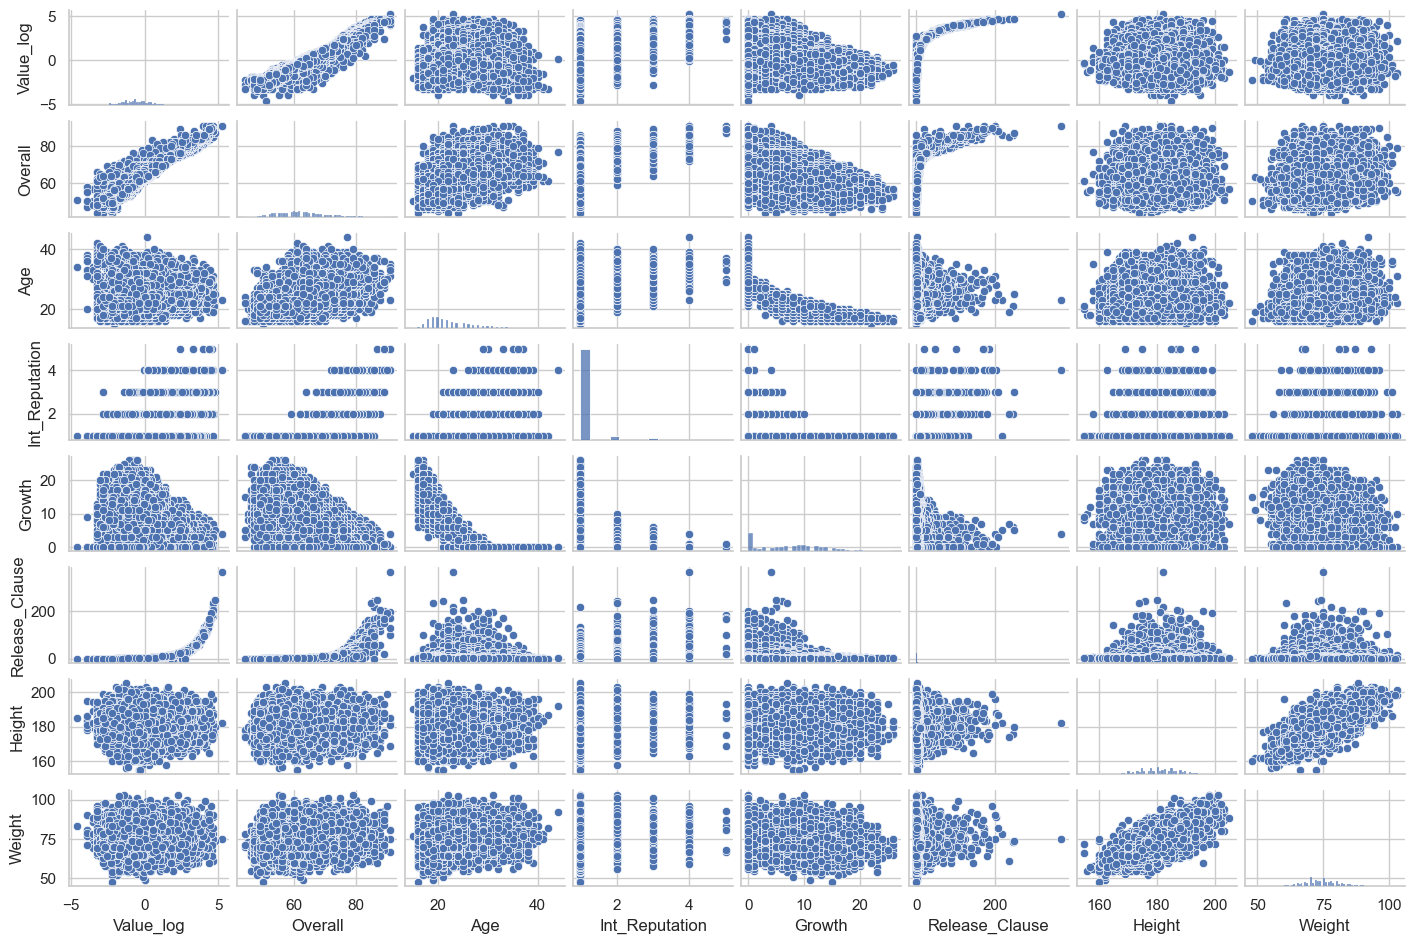

In [34]:
#Pairplot of selected features
plt.figure(1, figsize=(18, 7))
sns.set(style="whitegrid")
g=sns.pairplot(player_list_selected_features, height=1.2, aspect=1.5)
plt.yticks(rotation=90); 
plt.show()

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X1,y1,test_size=0.2, random_state=10)

X_train, X_val, y_train, y_val = train_test_split(X1,y1, test_size=.25, random_state=10)

lr = LinearRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_val)
mse = np.mean((pred-y_val)**2)

print(lr.score(X_test,y_test))
print(mse)
print(lr.coef_)

0.9917059704144238
0.4125640699936027
[ 0.00476981 -0.02374719  0.72529522 -0.02609203  0.49897189]


In [36]:
coeff = pd.DataFrame(X_train.columns)

coeff['CoefficientEstimate'] = lr.coef_

coeff.sort_values("CoefficientEstimate")

,0,CoefficientEstimate
3,Growth,-0.026092
1,Age,-0.023747
0,Overall,0.004770
4,Release_Clause,0.498972
2,Int_Reputation,0.725295


In [39]:
#set up the 4 models we're choosing from:

Xs= player_list.loc[:,['Overall','Age','Int_Reputation','Growth','Release_Clause']]
ys= player_list.loc[:,"Value_log"]

X, X_test, y, y_test = train_test_split(Xs,ys,test_size=0.2, random_state=10)

X_train, X_val, y_train, y_val = train_test_split(Xs,ys, test_size=.25, random_state=10)


lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=0.05, normalize=True)

lm_lasso = Lasso(alpha=0.05, normalize=True)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X1_poly = poly.fit_transform(Xs.values)
X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

lm.fit(X_train, y_train)
print(f'Linear Regression for all data R^2: {lm.score(X1, y1):.3f}')
print(f'Linear Regression for test data R^2: {lm.score(X_test, y_test):.3f}')
print(f'Linear Regression for validation data R^2: {lm.score(X_val, y_val):.3f}')
print("")

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression for test data R^2: {lm_reg.score(X_test_scaled, y_test):.3f}')
print(f'Ridge Regression for validation data R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')
print("")


lm_lasso.fit(X_train,y_train)
print(f'Lasso Regression for test data R^2: {lm_lasso.score(X_test, y_test):.6f}')
print(f'Lasso Regression for validation data R^2: {lm_lasso.score(X_val, y_val):.6f}')
print("")

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression for test data R^2: {lm_poly.score(X_test_poly, y_test):.3f}')
print(f'Degree 2 polynomial regression for validayion data R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

Linear Regression for all data R^2: 0.063
Linear Regression for test data R^2: 0.963
Linear Regression for validation data R^2: 0.964

Ridge Regression for test data R^2: 0.957
Ridge Regression for validation data R^2: 0.958

Lasso Regression for test data R^2: -0.000207
Lasso Regression for validation data R^2: -0.000526

Degree 2 polynomial regression for test data R^2: 0.979
Degree 2 polynomial regression for validayion data R^2: 0.980


C:\Users\adhna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\adhna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was d

In [40]:
#set up the 4 models we're choosing from:

lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=0.05, normalize=True)

lm_lasso = Lasso(alpha=0.05, normalize=True)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X1_poly = poly.fit_transform(X1.values)
X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

lm.fit(X_train, y_train)
print(f'Linear Regression for all data R^2: {lm.score(X1, y1):.3f}')
print(f'Linear Regression for test data R^2: {lm.score(X_test, y_test):.3f}')
print(f'Linear Regression for validation data R^2: {lm.score(X_val, y_val):.3f}')
print("")

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression for test data R^2: {lm_reg.score(X_test_scaled, y_test):.3f}')
print(f'Ridge Regression for validation data R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')
print("")


lm_lasso.fit(X_train,y_train)
print(f'Lasso Regression for test data R^2: {lm_lasso.score(X_test, y_test):.6f}')
print(f'Lasso Regression for validation data R^2: {lm_lasso.score(X_val, y_val):.6f}')
print("")

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression for test data R^2: {lm_poly.score(X_test_poly, y_test):.3f}')
print(f'Degree 2 polynomial regression for validayion data R^2: {lm_poly.score(X_val_poly, y_val):.3f}')


Linear Regression for all data R^2: 0.063
Linear Regression for test data R^2: 0.963
Linear Regression for validation data R^2: 0.964

Ridge Regression for test data R^2: 0.957
Ridge Regression for validation data R^2: 0.958

Lasso Regression for test data R^2: -0.000207
Lasso Regression for validation data R^2: -0.000526

Degree 2 polynomial regression for test data R^2: 0.979
Degree 2 polynomial regression for validayion data R^2: 0.980


C:\Users\adhna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\adhna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was d

In [41]:
model= sm.OLS(y1, X1, data=player_list_selected_features)

results = model.fit()

print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Value   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                          4.122e+05
Date:                Fri, 05 May 2023   Prob (F-statistic):                        0.00
Time:                        19:15:01   Log-Likelihood:                         -16126.
No. Observations:               16060   AIC:                                  3.226e+04
Df Residuals:                   16055   BIC:                                  3.230e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

C:\Users\adhna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['data']
  warnings.warn(msg, ValueWarning)


In [42]:
# Dummy Variables for Position
X2 = pd.concat([player_list.drop('Position', axis=1), pd.get_dummies(player_list['Position'])],axis=1)

X2 = X2.drop(columns=["Value","Name","Team","Foot"])

y2 = yb= player_list.loc[:,"Value"]

In [43]:
# fit model with target as player market value 
player_model2 = sm.OLS(y2, X2, data=player_list)

results2 = player_model2.fit()

print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 2.942e+04
Date:                Fri, 05 May 2023   Prob (F-statistic):               0.00
Time:                        19:20:23   Log-Likelihood:                -15892.
No. Observations:               16060   AIC:                         3.192e+04
Df Residuals:                   15994   BIC:                         3.242e+04
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Age                 -0.0023      0.003  

C:\Users\adhna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['data']
  warnings.warn(msg, ValueWarning)


In [44]:
# Dummy Variables for Team

X3 = pd.concat([player_list.drop('Team', axis=1), pd.get_dummies(player_list['Team'])],axis=1)

X3 = X3.drop(columns=["Value","Name","Position","Foot"])

y3 = yb= player_list.loc[:,"Value"]

In [45]:
# fit model with target as player market value 
player_model3 = sm.OLS(y3, X3, data=player_list)

results3 = player_model3.fit()

print(results3.summary())

C:\Users\adhna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['data']
  warnings.warn(msg, ValueWarning)


                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     2829.
Date:                Fri, 05 May 2023   Prob (F-statistic):               0.00
Time:                        19:21:22   Log-Likelihood:                -12434.
No. Observations:               16060   AIC:                         2.684e+04
Df Residuals:                   15076   BIC:                         3.440e+04
Df Model:                         983                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Age                 

In [57]:
#set up the model with log value

X1= player_list.loc[:,['Overall','Age','Weight','Height','Growth','Release_Clause',]]
y1= player_list.loc[:,"Value"]

yl = np.log1p(y1)

player_model1 = sm.OLS(yl, X1, data=player_list)

results1 = player_model1.fit()

results1.summary()

C:\Users\adhna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['data']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Value   R-squared (uncentered):                   0.951
Model:                            OLS   Adj. R-squared (uncentered):              0.951
Method:                 Least Squares   F-statistic:                          5.225e+04
Date:                Fri, 05 May 2023   Prob (F-statistic):                        0.00
Time:                        19:49:57   Log-Likelihood:                          1210.7
No. Observations:               16060   AIC:                                     -2409.
Df Residuals:                   16054   BIC:                                     -2363.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Overall            0.0672      0.000    203.166      0.000       0.067       0.068
Age               -0.0475      0.001    -60.994      0.000      -0.049      -0.046
Weight             0.0080      0.000     21.750      0.000       0.007       0.009
Height            -0.0166      0.000    -73.842      0.000      -0.017      -0.016
Growth            -0.0109      0.001    -18.030      0.000      -0.012      -0.010
Release_Clause     0.0219      0.000    140.762      0.000       0.022       0.022
==============================================================================
Omnibus:                     6532.515   Durbin-Watson:                   1.512
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           598259.634
Skew:                          -1.029   Prob(JB):                         0.00
Kurtosis:                      32.830   Cond. No.                         110.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
#what coefficients our regression model has chosen
regressor = LinearRegression()
regressor.fit(X1,yl)
coeff_df = pd.DataFrame(regressor.coef_, X1.columns, columns=['Coefficient'])  
coeff_df.sort_values("Coefficient",ascending=False)


,Coefficient
Overall,0.072747
Release_Clause,0.020539
Height,0.000791
Growth,-0.000213
Weight,-0.002019
Age,-0.035700


In [59]:
y_pred = regressor.predict(X1)
y_pred

array([3.11510339, 3.24578423, 0.13372327, ..., 0.29324969, 1.5562389 ,
       1.4998466 ])

In [60]:
#Prediction on all data and calculate difference between tha actual value and predicted value
#ye=np.exp(yl)
y_pred = regressor.predict(X1)
df = pd.DataFrame({'Name':player_list.Name,'Actual': y1, 'Predicted': (y_pred)})
df['Actual_n'] = np.expm1(df['Actual'])
df['Predicted_n'] = np.expm1(df['Predicted'])

# df_under = round(df.sort_values('Difference_n').set_index('Name').head(10),2)
# df_over = round(df.sort_values('Difference_n').set_index('Name').tail(10),2)
df

,Name,Actual,Predicted,Actual_n,Predicted_n
0,A. Mac Allister,30.00,3.115103,1.068647e+13,21.535760
5,O. Kökçü,39.50,3.245784,1.427684e+17,24.681843
6,E. Dick,0.19,0.133723,2.092496e-01,0.143076
8,Gabri Veiga,3.60,1.411113,3.559823e+01,3.100516
9,A. Al Musrati,30.50,3.151186,1.761902e+13,22.363763
...,...,...,...,...,...
18668,22 Hwang Jung Wook,0.11,-0.296924,1.162781e-01,-0.256899
18669,Kim Chae Woon,0.70,0.568489,1.013753e+00,0.765598
18670,Kim Jeong hoon,0.32,0.293250,3.771278e-01,0.340778
18671,Alejandro Garnacho,4.00,1.556239,5.359815e+01,3.740956


Ridge regression, Lasso regression, and Polynomial regression are all regression techniques used in machine learning to model the relationship between a dependent variable and one or more independent variables. Here's a brief overview of each technique:

Ridge Regression: Ridge regression is a linear regression technique that is used to prevent overfitting of the model. It adds a penalty term to the least squares objective function so that the coefficients of the independent variables are reduced. The penalty term is controlled by a hyperparameter called the regularization parameter, which determines the strength of the penalty.

Lasso Regression: Lasso regression, like ridge regression, is also used to prevent overfitting of the model. However, it uses a different penalty term called the L1 penalty, which results in some of the coefficients of the independent variables being set to zero. This makes Lasso regression useful for feature selection, as it can identify which independent variables are most important for predicting the dependent variable.

Polynomial Regression: Polynomial regression is a nonlinear regression technique that involves fitting a polynomial function to the data. It can be used to model more complex relationships between the independent and dependent variables than linear regression. Polynomial regression involves adding polynomial terms of higher degrees to the regression equation. For example, a quadratic polynomial regression model would have a term for x, x^2, and a constant.

All three techniques can be used to improve the performance of a linear regression model by addressing issues like overfitting and underfitting. The choice of which technique to use depends on the specific problem and the characteristics of the data.

The choice of machine learning model will depend on the specific characteristics of your data and the nature of the prediction problem you are trying to solve. Some common machine learning models for supervised learning problems include:

Linear Regression: If your prediction problem involves predicting a continuous numerical value, such as the price of a house or the temperature, linear regression may be a good choice.

Decision Trees: If your data has a mix of categorical and numerical attributes and you want to predict a categorical output, such as whether a customer will make a purchase or not, decision trees may be a good choice.

Random Forests: If you have a large number of attributes and want to reduce the risk of overfitting, random forests can be an effective model to use. It works by combining multiple decision trees to make a prediction.

Support Vector Machines (SVM): If your data has a clear boundary between classes and you want to predict a categorical output, SVMs can be a good choice. It works by finding the hyperplane that best separates the classes in the data.

Neural Networks: If your data is complex and has many attributes, neural networks can be a good choice. They are particularly effective in tasks such as image recognition, natural language processing, and speech recognition.

It is recommended to try out different models and compare their performance on your specific data set using appropriate evaluation metrics. You may also need to preprocess your data to address missing values, outliers, and feature scaling.

It's always important to keep in mind that the performance of a machine learning model depends not only on the choice of algorithm, but also on the quality of the data and the features used for training.

Final Model


In [62]:
#set up the 4 models we're choosing from:

X1= player_list.loc[:,['Overall','Age','Weight','Height','Growth','Release_Clause',]]
y1= player_list.loc[:,"Value"]

yl = np.log1p(y1)

X_train, X_test, y_train, y_test = train_test_split(X1,yl,test_size=0.2, random_state=10)

X_train, X_val, y_train, y_val = train_test_split(X1,yl, test_size=.25, random_state=10)


lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=0.05, normalize=True)

lm_lasso = Lasso(alpha=0.05, normalize=True)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X1_poly = poly.fit_transform(X.values)
X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

lm.fit(X_train, y_train)
print(f'Linear Regression for all data R^2: {lm.score(X1, yl):.6f}')
print(f'Linear Regression for test data R^2: {lm.score(X_test, y_test):.6f}')
print(f'Linear Regression for validation data R^2: {lm.score(X_val, y_val):.6f}')
print("")

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression for test data R^2: {lm_reg.score(X_test_scaled, y_test):.6f}')
print(f'Ridge Regression for validation data R^2: {lm_reg.score(X_val_scaled, y_val):.6f}')
print("")


lm_lasso.fit(X_train,y_train)
print(f'Lasso Regression for test data R^2: {lm_lasso.score(X_test, y_test):.6f}')
print(f'Lasso Regression for validation data R^2: {lm_lasso.score(X_val, y_val):.6f}')
print("")

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression for test data R^2: {lm_poly.score(X_test_poly, y_test):.6f}')
print(f'Degree 2 polynomial regression for validation data R^2: {lm_poly.score(X_val_poly, y_val):.6f}')


Linear Regression for all data R^2: 0.920668
Linear Regression for test data R^2: 0.925200
Linear Regression for validation data R^2: 0.922897

Ridge Regression for test data R^2: 0.921809
Ridge Regression for validation data R^2: 0.919228

Lasso Regression for test data R^2: -0.000027
Lasso Regression for validation data R^2: -0.000186

Degree 2 polynomial regression for test data R^2: 0.990562
Degree 2 polynomial regression for validation data R^2: 0.990892


C:\Users\adhna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\adhna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was d

In [63]:
#Run Cross Validation

lm = LinearRegression()
kf = KFold(n_splits=10, shuffle=True, random_state = 10)
cross_val_score(lm, X1, yl, cv=kf, scoring='r2')

print(round(np.mean(cross_val_score(lm, X1, yl, cv=kf, scoring='r2')),5))

0.92021


C:\Users\adhna\AppData\Local\Temp\ipykernel_14268\3794572438.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x).set_title('Frequency Distribution Plot of Player Logaritmic Values')


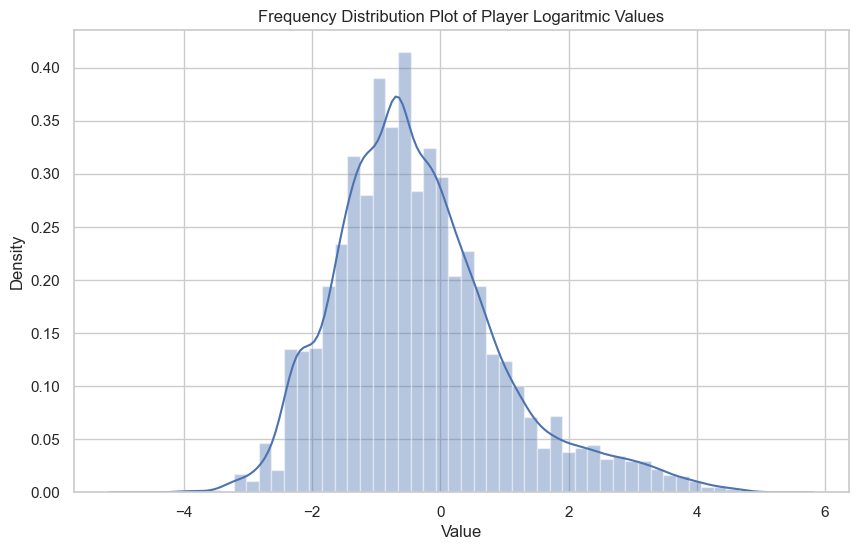

In [64]:
x = player_list.Value
x = np.log(x)
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.distplot(x).set_title('Frequency Distribution Plot of Player Logaritmic Values')
plt.show()